<a href="https://colab.research.google.com/github/PatWoo23/Data-Analysis/blob/main/DataQualityAssessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Load the dataset
onlinestore = pd.read_excel(r"C:\Users\Administrator\Desktop\Sales.xlsx")


In [ ]:
#Check the first 5 rows of the dataset
print(onlinestore.head())

    Order ID Order Date    Status  Item ID                  SKU  Quantity  \
0  100354678 2020-10-01  received   574772   oasis_Oasis-064-36        21   
1  100354678 2020-10-01  received   574774      Fantastic_FT-48        11   
2  100354680 2020-10-01  complete   574777      mdeal_DMC-610-8         9   
3  100354680 2020-10-01  complete   574779   oasis_Oasis-061-36         9   
4  100367357 2020-11-13  received   595185  MEFNAR59C38B6CA08CD         2   

   Price  Original Sale  Sale After Discount       Category  ...  \
0   89.9         1798.0               1798.0  Men's Fashion  ...   
1   19.0          190.0                190.0  Men's Fashion  ...   
2  149.9         1199.2               1199.2  Men's Fashion  ...   
3   79.9          639.2                639.2  Men's Fashion  ...   
4   99.9           99.9                 99.9  Men's Fashion  ...   

                 E Mail  Customer Since    Phone No.   County    City State  \
0  jani.titus@gmail.com      2006-08-22  405-959-

# Data Preparation

## Check Missing Values
No missing values in the dataset

In [ ]:
#check if there are any missing values in the dataset
print(onlinestore.isnull().sum())

Order ID               0
Order Date             0
Status                 0
Item ID                0
SKU                    0
Quantity               0
Price                  0
Original Sale          0
Sale After Discount    0
Category               0
Payment Method         0
Customer ID            0
Year                   0
Month                  0
Reference Number       0
Name Prefix            0
First Name             0
Last Name              0
Gender                 0
Age                    0
E Mail                 0
Customer Since         0
Phone No.              0
County                 0
City                   0
State                  0
Zip Code               0
Region                 0
User Name              0
Discount Percentage    0
dtype: int64


## Data Structure

In [ ]:
print(onlinestore.dtypes)

Order ID                       object
Order Date             datetime64[ns]
Status                         object
Item ID                         int64
SKU                            object
Quantity                        int64
Price                         float64
Original Sale                 float64
Sale After Discount           float64
Category                       object
Payment Method                 object
Customer ID                     int64
Year                            int64
Month                  datetime64[ns]
Reference Number                int64
Name Prefix                    object
First Name                     object
Last Name                      object
Gender                         object
Age                             int64
E Mail                         object
Customer Since         datetime64[ns]
Phone No.                      object
County                         object
City                           object
State                          object
Zip Code    

In [ ]:
print(onlinestore.describe())

                          Order Date        Item ID       Quantity  \
count                         286392  286392.000000  286392.000000   
mean   2021-03-12 11:18:32.008715264  741664.902131       3.011296   
min              2020-10-01 00:00:00  574769.000000       1.000000   
25%              2020-12-24 00:00:00  659684.500000       2.000000   
50%              2021-03-16 00:00:00  742309.000000       2.000000   
75%              2021-05-18 00:00:00  826124.250000       3.000000   
max              2021-09-30 00:00:00  905208.000000     501.000000   
std                              NaN   95746.031827       4.573837   

               Price  Original Sale  Sale After Discount    Customer ID  \
count  286392.000000  286392.000000        286392.000000  286392.000000   
mean      851.385253     885.879934           815.840507   70048.019054   
min         0.000000       0.000000             0.000000       4.000000   
25%        49.900000      49.900000            49.900000   56519.0000

## Check whether Order Date and Customer Since are datetime objects

In [ ]:
# Original data types of Order Date and Customer Since
print(onlinestore['Order Date'].dtype)
print(onlinestore['Customer Since'].dtype)

datetime64[ns]
datetime64[ns]


## Descriptive Statistics

In [ ]:
# describe the data to get some statistics
data_description = onlinestore.describe(include='all')
print(data_description)

           Order ID                     Order Date    Status        Item ID  \
count      286392.0                         286392    286392  286392.000000   
unique     201716.0                            NaN        13            NaN   
top     100476608.0                            NaN  canceled            NaN   
freq           43.0                            NaN    112166            NaN   
mean            NaN  2021-03-12 11:18:32.008715264       NaN  741664.902131   
min             NaN            2020-10-01 00:00:00       NaN  574769.000000   
25%             NaN            2020-12-24 00:00:00       NaN  659684.500000   
50%             NaN            2021-03-16 00:00:00       NaN  742309.000000   
75%             NaN            2021-05-18 00:00:00       NaN  826124.250000   
max             NaN            2021-09-30 00:00:00       NaN  905208.000000   
std             NaN                            NaN       NaN   95746.031827   

                        SKU       Quantity         

## Check Duplicate Entries - No Duplicate

In [ ]:
# Check for duplicate entries in the dataset
duplicates = onlinestore.duplicated()

# Count the number of duplicate rows
number_of_duplicates = duplicates.sum()

# Display the number of duplicate rows and return the duplicated rows if any
print(number_of_duplicates)

0


## Check if the same city name exists in different states

Yes, I have created a new column called 'City_State'.

In [ ]:
# Create a DataFrame to check if the same city name exists in different states
city_state_df = onlinestore.groupby('City')['State'].nunique().reset_index(name='State')
print(city_state_df)

# Create a new DataFrame for cities that appear in more than one state
state_city_df = city_state_df[city_state_df['State'] > 1]
print(state_city_df)


               City  State
0              True      1
1             Aaron      1
2        Aaronsburg      1
3         Abbeville      5
4        Abbotsford      1
...             ...    ...
15887     Zullinger      1
15888  Zumbro Falls      1
15889          Zuni      2
15890       Zwingle      1
15891        Zwolle      1

[15892 rows x 2 columns]
             City  State
3       Abbeville      5
9        Aberdeen      6
13        Abilene      2
14       Abingdon      3
15       Abington      2
...           ...    ...
15847       Yukon      4
15849        Yuma      3
15860  Zanesville      2
15861      Zanoni      2
15889        Zuni      2

[3314 rows x 2 columns]


In [ ]:
#Check City and State datatypes
print(onlinestore['City'].dtype)
print(onlinestore['State'].dtype)

#Check for boolean values in City and State columns
print(onlinestore[onlinestore['City'].apply(lambda x: isinstance(x, bool))])
print(onlinestore[onlinestore['State'].apply(lambda x: isinstance(x, bool))])

object
object
         Order ID Order Date    Status  Item ID                    SKU  \
158490  100430701 2021-01-01  complete   703946  WOFGOL5A004C0B29D98-M   

        Quantity  Price  Original Sale  Sale After Discount         Category  \
158490         2  249.9          249.9                249.9  Women's Fashion   

        ...                       E Mail  Customer Since    Phone No.   \
158490  ...  zackary.kilburn@hotmail.com      2011-07-17  304-889-1104   

         County  City State Zip Code Region  User Name  Discount Percentage  
158490  Summers  True    WV    25988  South  zpkilburn                  0.0  

[1 rows x 30 columns]
Empty DataFrame
Columns: [Order ID, Order Date, Status, Item ID, SKU, Quantity, Price, Original Sale, Sale After Discount, Category, Payment Method, Customer ID, Year, Month, Reference Number, Name Prefix, First Name, Last Name, Gender, Age, E Mail, Customer Since, Phone No. , County, City, State, Zip Code, Region, User Name, Discount Percentage]

In [ ]:
#Add a column to the dataset for City_Sate format
onlinestore['City_State'] = onlinestore.apply(lambda x: str(x['City']) + '_' + str(x['State']).replace(' ', ''), axis=1)
print(onlinestore['City_State'].head())

0    Vinson_OK
1    Vinson_OK
2    Vinson_OK
3    Vinson_OK
4    Vinson_OK
Name: City_State, dtype: object


## Check Missing Values in Dataset - None

In [ ]:
# Checking for missing values in the dataset
missing_values = onlinestore.isnull().sum()
print(missing_values)


Order ID               0
Order Date             0
Status                 0
Item ID                0
SKU                    0
Quantity               0
Price                  0
Original Sale          0
Sale After Discount    0
Category               0
Payment Method         0
Customer ID            0
Year                   0
Month                  0
Reference Number       0
Name Prefix            0
First Name             0
Last Name              0
Gender                 0
Age                    0
E Mail                 0
Customer Since         0
Phone No.              0
County                 0
City                   0
State                  0
Zip Code               0
Region                 0
User Name              0
Discount Percentage    0
City_State             0
dtype: int64


## Check Null Values in Dataset - None

In [ ]:
#Check null values in the dataset
print(onlinestore.isnull().sum())


Order ID               0
Order Date             0
Status                 0
Item ID                0
SKU                    0
Quantity               0
Price                  0
Original Sale          0
Sale After Discount    0
Category               0
Payment Method         0
Customer ID            0
Year                   0
Month                  0
Reference Number       0
Name Prefix            0
First Name             0
Last Name              0
Gender                 0
Age                    0
E Mail                 0
Customer Since         0
Phone No.              0
County                 0
City                   0
State                  0
Zip Code               0
Region                 0
User Name              0
Discount Percentage    0
City_State             0
dtype: int64


# Check Outliers

## For Original Sale

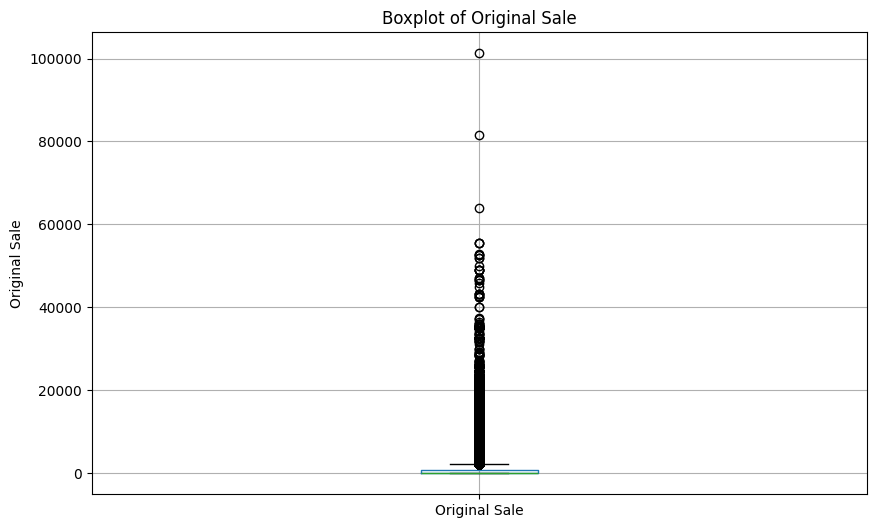

In [ ]:
#generate the boxplot for the original sale column
plt.figure(figsize=(10, 6))
onlinestore.boxplot(column='Original Sale')
plt.title('Boxplot of Original Sale')
plt.ylabel('Original Sale')
plt.show()

In [ ]:
#calculate interquartile range for original sale
Q1 = onlinestore['Original Sale'].quantile(0.25)
Q3 = onlinestore['Original Sale'].quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier cutoffs
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR

(outlier_lower_bound, outlier_upper_bound)


(-1240.25, 2200.15)

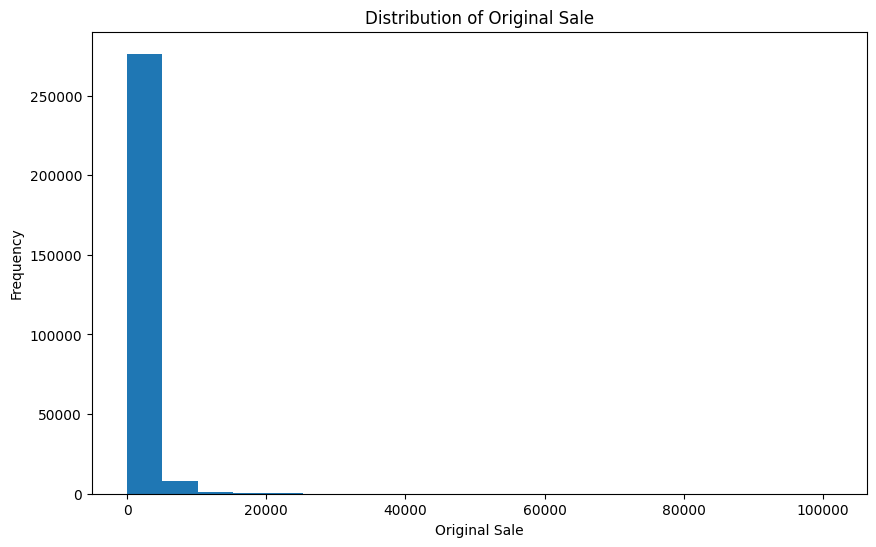

In [ ]:
#generate the distribution plot for the original sale column
plt.figure(figsize=(10, 6))
onlinestore['Original Sale'].plot(kind='hist', bins=20)
plt.title('Distribution of Original Sale')
plt.xlabel('Original Sale')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Calculate the number of the outlier and total entries in the dataset
num_outliers = onlinestore[(onlinestore['Original Sale'] < outlier_lower_bound) | (onlinestore['Original Sale'] > outlier_upper_bound)]
total_entries = onlinestore.shape[0]

#Calculate the proportion of sales that are outliers
proportion_outliers = num_outliers.shape[0] / total_entries

#Round the proportion to three decimal places
proportion_outliers = round(proportion_outliers*100, 3)

#print the result
print(f'Number of outliers: {num_outliers.shape[0]}')
print(f'Total entries: {total_entries}')
print(f'Proportion of outliers: {proportion_outliers:.2f}%')


Number of outliers: 29133
Total entries: 286392
Proportion of outliers: 10.17%


## For Sale After Discount

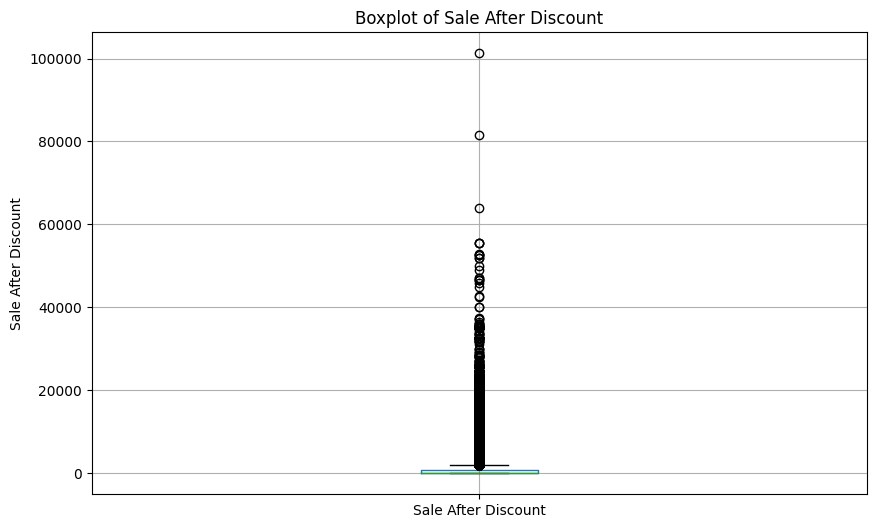

In [ ]:
#generate the boxplot for the Sale After Discount column
plt.figure(figsize=(10, 6))
onlinestore.boxplot(column='Sale After Discount')
plt.title('Boxplot of Sale After Discount')
plt.ylabel('Sale After Discount')
plt.show()

In [ ]:
#calculate interquartile range for Sale After Discount
Q1 = onlinestore['Sale After Discount'].quantile(0.25)
Q3 = onlinestore['Sale After Discount'].quantile(0.75)
IQR = Q3 - Q1

# Defining the outlier cutoffs
outlier_lower_bound = Q1 - 1.5 * IQR
outlier_upper_bound = Q3 + 1.5 * IQR

(outlier_lower_bound, outlier_upper_bound)


(-1075.25, 1925.15)

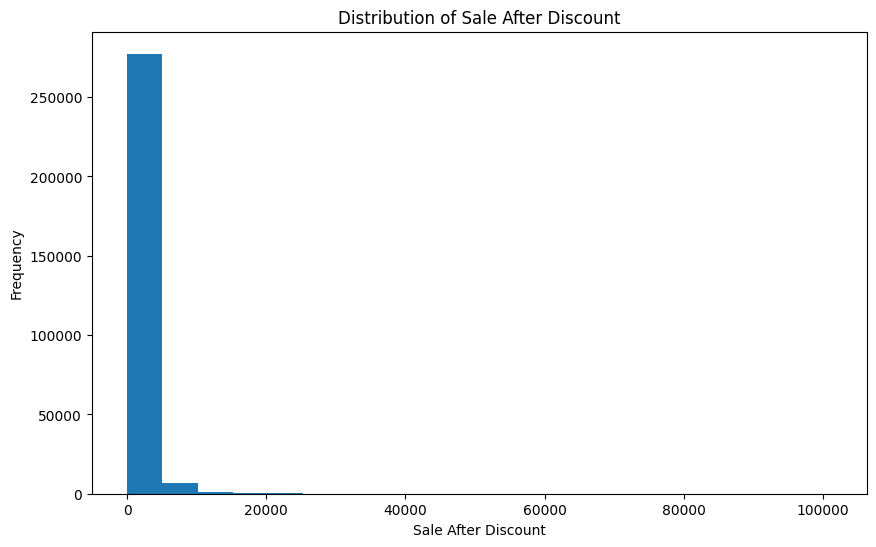

In [ ]:
#generate the distribution plot for the Sale After Discount column
plt.figure(figsize=(10, 6))
onlinestore['Sale After Discount'].plot(kind='hist', bins=20)
plt.title('Distribution of Sale After Discount')
plt.xlabel('Sale After Discount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Calculate the number of the outlier and total entries in the dataset
num_outliers = onlinestore[(onlinestore['Sale After Discount'] < outlier_lower_bound) | (onlinestore['Sale After Discount'] > outlier_upper_bound)]
total_entries = onlinestore.shape[0]

#Calculate the proportion of sales that are outliers
proportion_outliers = num_outliers.shape[0] / total_entries

#Round the proportion to three decimal places
proportion_outliers = round(proportion_outliers*100, 3)

#print the result
print(f'Number of outliers: {num_outliers.shape[0]}')
print(f'Total entries: {total_entries}')
print(f'Proportion of outliers: {proportion_outliers:.2f}%')


Number of outliers: 31011
Total entries: 286392
Proportion of outliers: 10.83%


## Round the 'Discount Percentage', 'Price', 'Sale After Discount', and 'Original Sale' columns to 2 decimal points

In [ ]:
# Round the 'Discount Percentage', 'Price', 'Sale After Discount', and 'Original Sale' columns to 2 decimal points
onlinestore[['Discount Percentage', 'Price', 'Sale After Discount', 'Original Sale']] = onlinestore[['Discount Percentage', 'Price', 'Sale After Discount', 'Original Sale']].round(2)


# Display the first few rows to confirm the changes
print(onlinestore.head())


    Order ID Order Date    Status  Item ID                  SKU  Quantity  \
0  100354678 2020-10-01  received   574772   oasis_Oasis-064-36        21   
1  100354678 2020-10-01  received   574774      Fantastic_FT-48        11   
2  100354680 2020-10-01  complete   574777      mdeal_DMC-610-8         9   
3  100354680 2020-10-01  complete   574779   oasis_Oasis-061-36         9   
4  100367357 2020-11-13  received   595185  MEFNAR59C38B6CA08CD         2   

   Price  Original Sale  Sale After Discount       Category  ...  \
0   89.9         1798.0               1798.0  Men's Fashion  ...   
1   19.0          190.0                190.0  Men's Fashion  ...   
2  149.9         1199.2               1199.2  Men's Fashion  ...   
3   79.9          639.2                639.2  Men's Fashion  ...   
4   99.9           99.9                 99.9  Men's Fashion  ...   

  Customer Since    Phone No.   County    City  State Zip Code Region  \
0     2006-08-22  405-959-1129  Harmon  Vinson     OK  

## Generate a unique payment ID

In [ ]:
# Generate a payment ID with a prefix and a sequential number based on the 'User Name'
def generate_payment_id_based_on_user_name(user_name, index):

    # Use the row's index for the sequential part, ensuring uniqueness
    return f'PAY-{user_name[:3].upper()}-{index + 1}'

# Use the 'User Name' and the row index to generate shipment IDs
onlinestore['Payment ID'] = onlinestore.apply(lambda x: generate_payment_id_based_on_user_name(x['User Name'], x.name), axis=1)

# Display the first few Payment IDs to confirm the format is based on 'User Name'
print(onlinestore['Payment ID'].head())

0    PAY-JWT-1
1    PAY-JWT-2
2    PAY-JWT-3
3    PAY-JWT-4
4    PAY-JWT-5
Name: Payment ID, dtype: object


## For column named Month, reformat it instead of OCT-20, we need OCT

In [ ]:
# Format the 'Month' column to display only the month abbreviation from the Timestamp
onlinestore['Month'] = onlinestore['Month'].apply(lambda x: x.strftime('%b').upper())


# Display the first few rows to confirm the changes
print(onlinestore['Month'].head())

0    OCT
1    OCT
2    OCT
3    OCT
4    NOV
Name: Month, dtype: object


In [ ]:
#Check duplicate entries in the dataset
duplicates = onlinestore.duplicated()

# Count the number of duplicate rows
number_of_duplicates = duplicates.sum()

# Display the number of duplicate rows and return the duplicated rows if any
print(number_of_duplicates)


0


# Saved to a new Excel file

In [ ]:
# Define the path for the new Excel file
new_file_path = r'C:\Users\Administrator\Desktop\OnlineStore_Cleaned.xlsx'

# Save the cleaned dataset to a new Excel file
onlinestore.to_excel(new_file_path, index=False)

